In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ETT data

In [4]:
data = pd.read_csv("../data/ETTh1.csv", sep=",")
data["time_idx"] = [x for x in range(data.shape[0])]
data.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,time_idx
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,0
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,1
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001,2
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001,3
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000,4


<AxesSubplot:xlabel='time_idx', ylabel='OT'>

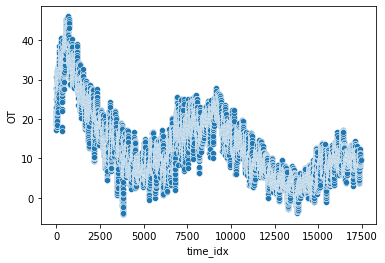

In [49]:
sns.scatterplot(data=data, x="time_idx", y="OT")

In [50]:
result = adfuller(data.OT)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.487964
p-value: 0.008302


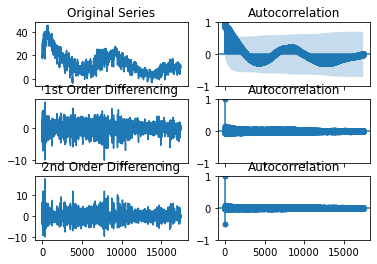

In [51]:
# make stationary

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.OT)
axes[0, 0].set_title('Original Series')
plot_acf(data.OT, ax=axes[0, 1], lags = np.arange(len(data)))

# 1st Differencing
axes[1, 0].plot(data.OT.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.OT.diff().dropna(), ax=axes[1, 1], lags = np.arange(len(data)-1))

# 2nd Differencing
axes[2, 0].plot(data.OT.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.OT.diff().diff().dropna(), ax=axes[2, 1], lags = np.arange(len(data)-2))

plt.show()

In [5]:
# Standardize
numerical = ["HUFL", "HULL", "MUFL", "MULL", "LUFL", "LULL", "OT"]
column_std = dict()
for num in numerical:
    x = data.loc[:11680, num]
    avg = x.mean()
    std = x.std()
    column_std[num] = {"mean": avg, "std": std}
    data.loc[:11680, num] = (x-avg)/std # train
    data.loc[11680:, num] = (data.loc[11680:, num]-avg)/std # test
del x

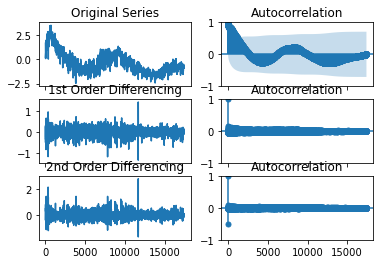

In [53]:
# make stationary

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.OT)
axes[0, 0].set_title('Original Series')
plot_acf(data.OT, ax=axes[0, 1], lags = np.arange(len(data)))

# 1st Differencing
axes[1, 0].plot(data.OT.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.OT.diff().dropna(), ax=axes[1, 1], lags = np.arange(len(data)-1))

# 2nd Differencing
axes[2, 0].plot(data.OT.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.OT.diff().diff().dropna(), ax=axes[2, 1], lags = np.arange(len(data)-2))

plt.show()

In [6]:
order = (12, 0, 12) # AR, I (stationary), MA
model = ARIMA(data.OT[:11680], order=order)

In [7]:
model_fit = model.fit()
print(model_fit.summary())

C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                     OT   No. Observations:                11680
Model:               ARIMA(12, 0, 12)   Log Likelihood                7891.691
Date:                Sun, 09 Jan 2022   AIC                         -15731.381
Time:                        21:49:09   BIC                         -15539.875
Sample:                             0   HQIC                        -15667.055
                              - 11680                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0141      0.148      0.095      0.924      -0.275       0.303
ar.L1         -0.1164      0.484     -0.241      0.810      -1.064       0.831
ar.L2          0.0860      0.296      0.291      0.7

In [8]:
model_fit.params

const     0.014084
ar.L1    -0.116405
ar.L2     0.086029
ar.L3     0.242026
ar.L4     0.108073
ar.L5    -0.004834
ar.L6     0.037693
ar.L7    -0.238388
ar.L8    -0.173424
ar.L9     0.112713
ar.L10    0.340260
ar.L11    0.502560
ar.L12    0.033564
ma.L1     1.103902
ma.L2     1.009430
ma.L3     0.789973
ma.L4     0.660738
ma.L5     0.649811
ma.L6     0.607224
ma.L7     0.843957
ma.L8     0.991626
ma.L9     0.839160
ma.L10    0.520046
ma.L11    0.010615
ma.L12   -0.031146
sigma2    0.015187
dtype: float64

In [9]:
"""train = data.OT[:8760]
validation = data.OT[8760:11680]
test = data.OT[11680:14600]"""
train = data.OT[:11680]
test = data.OT[11680:14600]

In [10]:
order = (4, 1, 4)
model = ARIMA(train, order=order)  
fitted = model.fit()
fitted.summary()

C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     OT   No. Observations:                11680
Model:                 ARIMA(4, 1, 4)   Log Likelihood                7952.899
Date:                Sun, 09 Jan 2022   AIC                         -15887.798
Time:                        21:49:40   BIC                         -15821.509
Sample:                             0   HQIC                        -15865.532
                              - 11680                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2558      0.142      1.799      0.072      -0.023       0.534
ar.L2         -0.0660      0.164     -0.403      0.687      -0.387       0.255
ar.L3         -0.0747      0.163     -0.458      0.647      -0.394       0.245
ar.L4          0.7096      0.129      5.495      0.000       0.457       0.963
ma.L1         -0.2979      0.140     -2.127      0.033      -0.573      -0.023
ma.L2          0.0487      0.167      0.291      0.771      -0.279       0.376
ma.L3          0.0491      0.164      0.300      0.764      -0.271       0.370
ma.L4         -0.7681      0.134     -5.735      0.000      -1.031      -0.506
sigma2         0.0150   9.96e-05    150.609      0.000       0.015       0.015
===================================================================================
Ljung-Box (L1) (Q):                   1.64   Jarque-Bera (JB):             18887.74
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
fc = fitted.forecast(test.shape[0], alpha=0.05)  # 95% conf

In [13]:
pr = fitted.predict(0, test.index[0])

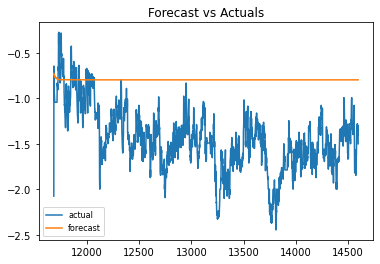

In [15]:
#plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='lower left', fontsize=8)
plt.show()

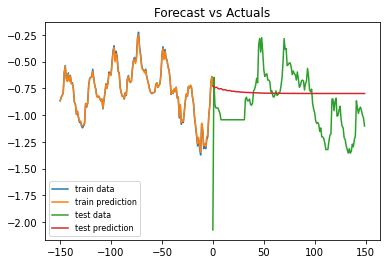

In [26]:
plt.plot([i for i in range(-150, 1)], train[-151:].to_numpy(), label='train data')
plt.plot([i for i in range(-150, 1)], pr[-151:].to_numpy(), label='train prediction')
plt.plot([i for i in range(150)], test[:150].to_numpy(), label='test data')
plt.plot([i for i in range(150)], fc[:150].to_numpy(), label='test prediction')
plt.title('Forecast vs Actuals')
plt.legend(loc='lower left', fontsize=8)
#plt.savefig("../report/images/arima_etth1.png", facecolor="white", bbox_inches="tight")
plt.show()

In [74]:
print(((test-res)**2).mean()) #MSE
print((test-res).abs().mean()) #MAE

0.3658285628714117
0.53550200329587


## ARIMA train/test

In [174]:
future = 168 # choose from [24, 48, 168, 336, 720]

In [164]:
train = data.OT[:11680]
test = data.OT[11680:14600]

In [155]:
order = (12, 1, 4)
model = ARIMA(train.diff().dropna(), order=order)  
fitted = model.fit()

C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [176]:
fc = fitted.forecast(future)

C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [177]:
pr = fitted.predict(test.index[0], test.index[0]+future)

C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [184]:
res = [train[test.index[0]-1]]
for i in test.index[:future]:
    res.append(res[-1]+fc[i-1])
res = res[1:]
res = pd.Series(data=res, index=[i for i in test.index[:future]])

In [185]:
print(((res-test)**2).mean()) #MSE
print((res-test).abs().mean()) #MAE

0.07616772414865797
0.2231561201195093


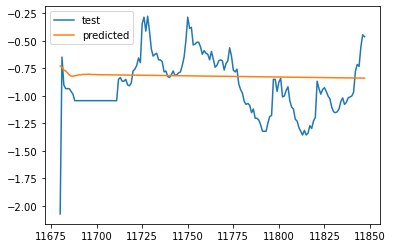

In [186]:
plt.plot(test[:future], label="test")
plt.plot(res, label="predicted")
plt.legend()

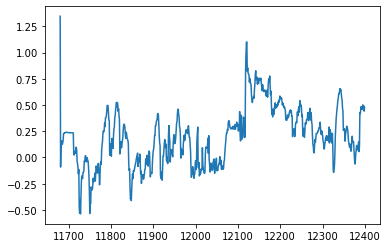

In [170]:
plt.plot((res-test[:future]))

In [189]:
train = data.OT[:11680]
test = data.OT[11680:14600]

order = (24, 1, 4)
model = ARIMA(train.diff().dropna(), order=order)  
fitted = model.fit()

for h in [24, 48, 168, 336, 720]:
    fc = fitted.forecast(h)
    
    res = [train[test.index[0]-1]]
    for i in test.index[:h]:
        res.append(res[-1]+fc[i-1])
    res = res[1:]
    res = pd.Series(data=res, index=[i for i in test.index[:h]])
    
    print(f"{h} MSE:{((res-test)**2).mean()}") #MSE
    print(f"MAE: {(res-test).abs().mean()}") #MAE

C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

24 MSE:0.08844116919559909
MAE: 0.13655974086710734
48 MSE:0.06752000539848897
MAE: 0.15471463827105422
168 MSE:0.19629794352343416
MAE: 0.3300521503110309
336 MSE:0.5887331381317674
MAE: 0.6354577573588249
720 MSE:3.522146450209893
MAE: 1.578724688438989


C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index b